In [2]:
!pip install aif360

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
import matplotlib.pyplot as plt

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [4]:
!pip install aif360[Reductions]

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
import matplotlib.pyplot as plt

In [10]:
# Load and prepare data
df = pd.read_csv('compas-scores-two-years.csv')

In [11]:
# Select relevant columns and rows
df = df[['race', 'age', 'priors_count', 'two_year_recid']].dropna()
df['two_year_recid'] = df['two_year_recid'].astype(int)

In [12]:
# Filter for only African-American and Caucasian defendants to simplify analysis
df = df[df['race'].isin(['African-American', 'Caucasian'])]

In [13]:
# Convert race to binary numerical values (1 for privileged group, 0 for unprivileged)
df['race'] = df['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [14]:
# Convert to AIF360 dataset
privileged_groups = [{'race': 1}]  # Caucasian
unprivileged_groups = [{'race': 0}]  # African-American

dataset = BinaryLabelDataset(
    df=df,
    label_names=['two_year_recid'],
    protected_attribute_names=['race'],
    favorable_label=0,  # 0 means no recidivism
    unfavorable_label=1  # 1 means recidivism occurred
)

In [15]:
# Calculate bias metrics
metric = BinaryLabelDatasetMetric(
    dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

In [19]:
# Calculate and print disparity metrics
print("Disparate Impact (should be close to 1):", metric.disparate_impact())
print("Statistical Parity Difference (should be close to 0):", metric.statistical_parity_difference())

Disparate Impact (should be close to 1): 0.8009476242843179
Statistical Parity Difference (should be close to 0): -0.12069679505498576


In [20]:
from aif360.metrics import ClassificationMetric
dataset_pred = dataset.copy()
dataset_pred.labels = dataset.labels
class_metric = ClassificationMetric(
    dataset,
    dataset_pred,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

print("False Positive Rate Difference (should be close to 0):", 
      class_metric.false_positive_rate_difference())
print("False Negative Rate Difference (should be close to 0):", 
      class_metric.false_negative_rate_difference())
print("Equal Opportunity Difference (should be close to 0):", 
      class_metric.equal_opportunity_difference())

False Positive Rate Difference (should be close to 0): 0.0
False Negative Rate Difference (should be close to 0): 0.0
Equal Opportunity Difference (should be close to 0): 0.0


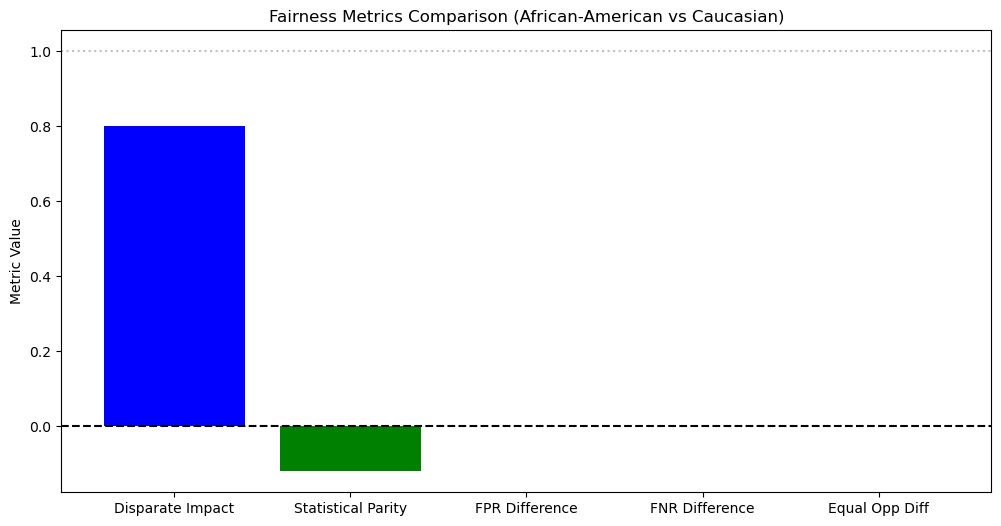

In [22]:
#Visualization
metrics = ['Disparate Impact', 'Statistical Parity', 'FPR Difference', 'FNR Difference', 'Equal Opp Diff']
values = [
    metric.disparate_impact(),
    metric.statistical_parity_difference(),
    class_metric.false_positive_rate_difference(),
    class_metric.false_negative_rate_difference(),
    class_metric.equal_opportunity_difference()
]

plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Fairness Metrics Comparison (African-American vs Caucasian)')
plt.ylabel('Metric Value')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5)  # Ideal for Disparate Impact

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_43644\2641115837.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


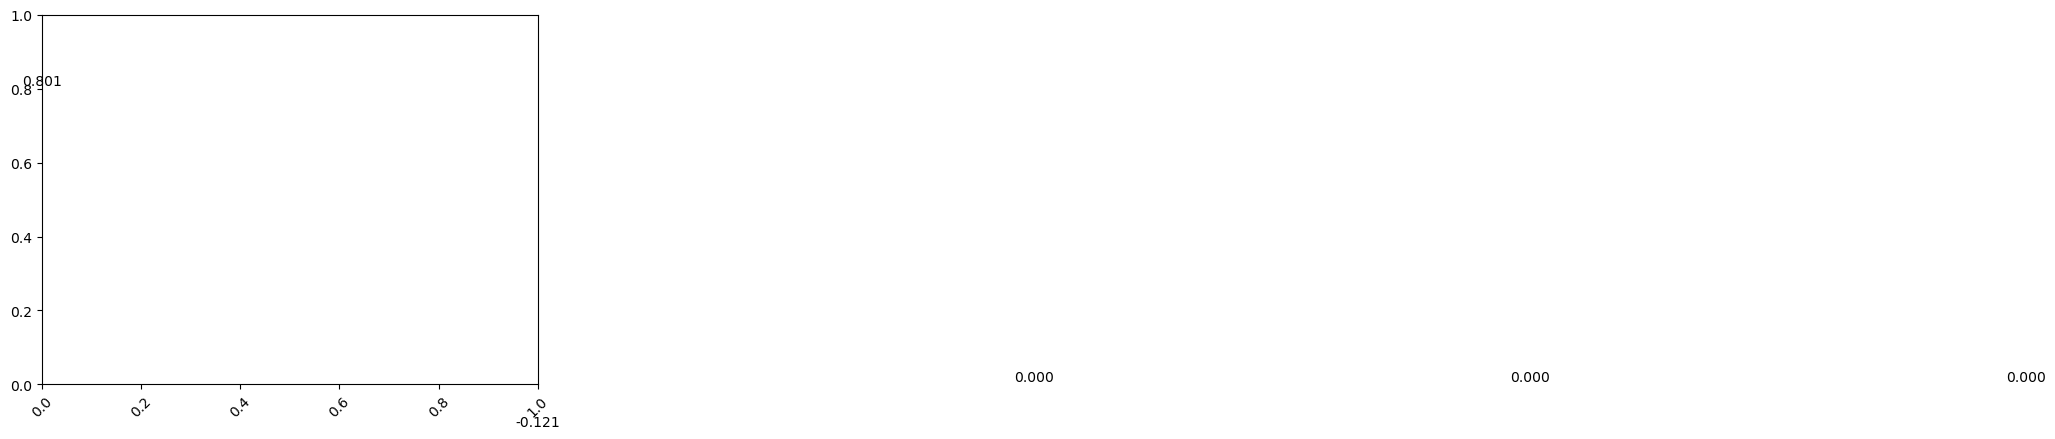

In [23]:
# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

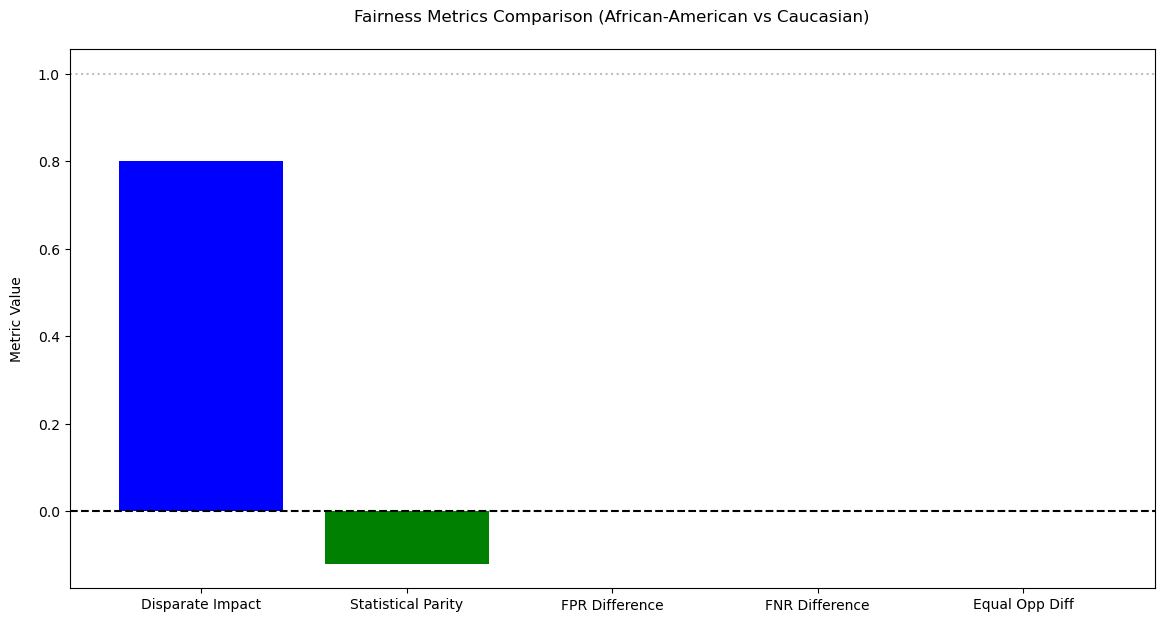

In [24]:
plt.figure(figsize=(14, 7))  # Increased figure size
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Fairness Metrics Comparison (African-American vs Caucasian)', pad=20)
plt.ylabel('Metric Value', labelpad=10)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5)

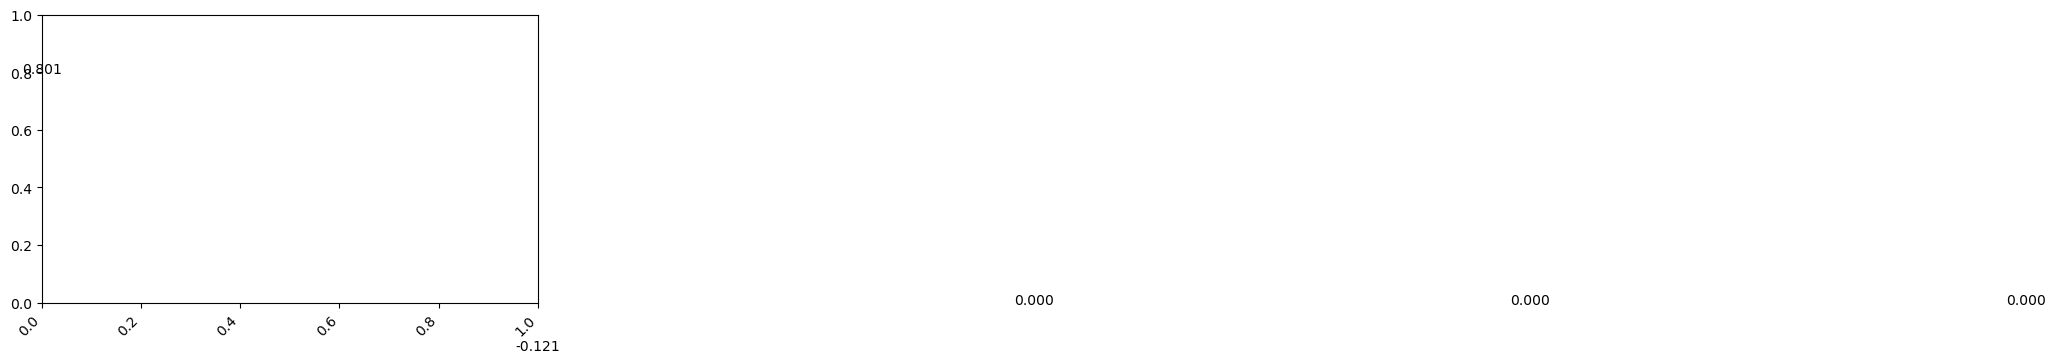

In [26]:
# Add value labels with adjusted positions
for bar in bars:
    height = bar.get_height()
    y_pos = height + 0.01 if height >= 0 else height - 0.03
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{height:.3f}',
             ha='center', va='center')

# Rotate x-axis labels and adjust bottom margin
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25, top=0.85)  # Adjust margins

# Remove tight_layout() since we're manually adjusting
plt.show()